Reproduces figure 1 from the paper.

In [1]:
from pymerlin.trajectory import *
import matplotlib.pyplot as plt
from pymerlin.utils import fibonacci
import matplotlib.gridspec as gridspec

In [2]:
fibonacci(7)

13

In [3]:
# Golden ratio
g = (1 + np.sqrt(5))/2

# Golden angle
ag = 2*np.pi/g**2

print("Golden ratio: {:.6f}\nGolden angle: {:.2f} deg".format(g, np.rad2deg(ag)))

Golden ratio: 1.618034
Golden angle: 137.51 deg


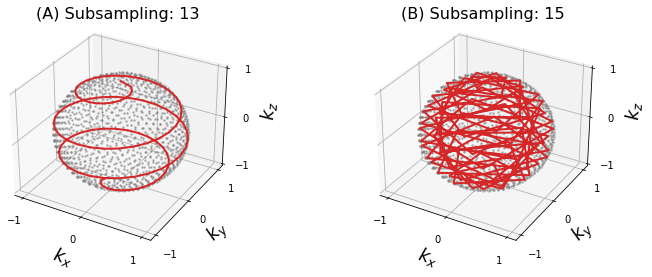

In [36]:
nspokes = 1300
n = np.arange(nspokes)

traj = linear_phyllotaxis(nspokes, nint=13, sf=7)

# Increment azimuthal angle by golden angle
phi = n*ag
# Produce a linear z gradient
z = 1 - 2*n/(nspokes-1)
theta = np.arccos(z)

# Convert to spherical coordinates
x = np.cos(phi)*np.sin(theta)
y = np.sin(phi)*np.sin(theta)

fig = plt.figure(figsize=(12,4))
labs = ['A', 'B']
for (i,ss) in enumerate([13,15]):
    ax = fig.add_subplot(1,2,i+1,projection='3d', facecolor='w')

    plt.plot(x,y,z, '.', alpha=0.5, markersize=3, color='gray')
    plt.plot(x[0::ss], y[0::ss], z[0::ss], color='C03', linewidth=2)
#     plt.plot(traj[0:100,0],traj[0:100,1],traj[0:100,2])
    ax.set_xticks([-1,0,1])
    ax.set_yticks([-1,0,1])
    ax.set_zticks([-1,0,1])
    ax.set_xlabel(r'$k_x$', fontsize=18)
    ax.set_ylabel(r'$k_y$', fontsize=18)
    ax.set_zlabel(r'$k_z$', fontsize=18)
    plt.title('({}) Subsampling: {:d}'.format(labs[i], ss), fontsize=16)
    ax.dist = 9
    
# plt.tight_layout()
plt.savefig('Figure1AB.png', dpi=300)
plt.show()

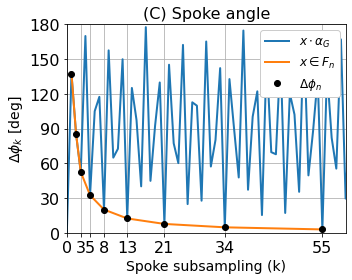

In [25]:
plt.figure(figsize=(5,4))
phi1 = np.mod(phi,2*np.pi)
mask = phi1>np.pi
phi1[mask] = -1*phi1[mask]+2*np.pi
phi1 *= 360/(2*np.pi)

fibnum = np.array([fibonacci(x) for x in range(2,11)])
plt.plot(n,phi1, label=r'$x\cdot \alpha_G$', color='C00', linewidth=2)
pred_diff = np.rad2deg(2*np.pi/g**(np.arange(2,11)))
plt.plot(fibnum, phi1[fibnum], '-', label=r'$x\in F_n$', color='C01', linewidth=2)
plt.plot(fibnum, pred_diff, 'ok', label=r'$\Delta \phi_n$')

plt.xlabel("Spoke subsampling (k)", fontsize=14)
plt.ylabel(r"$\Delta \phi_k$ [deg]", fontsize=14)
plt.legend(framealpha=1, loc='upper right', fontsize=12)
plt.axis([0,60,0,180])
plt.xticks([0,3,5,8,13,21,34,55], size=16)
plt.yticks(np.arange(0,181,30),size=16)
plt.grid()
plt.title('(C) Spoke angle', fontsize=16)
plt.tight_layout()
plt.savefig('Figure1_C.png', dpi=300)
plt.show()

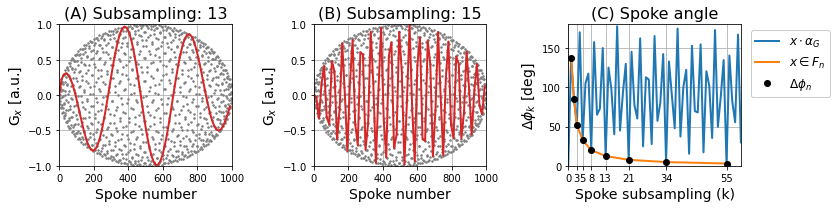

In [3]:
npoints = 1000
n = np.arange(npoints)

# Increment azimuthal angle by golden angle
phi = n*ag
# Produce a linear z gradient
theta = np.arccos(n/npoints*2-1)

# Convert to spherical coordinates
x = np.cos(phi)*np.sin(theta)
y = np.sin(phi)*np.sin(theta)

fig = plt.figure(figsize=(12,3))
labs = ['A', 'B']
for (i,ss) in enumerate([13, 15]):
    fig.add_subplot(1,3,i+1)
    plt.plot(n,x, '.', markersize=3, color='gray')
    plt.plot(n[0::ss],x[0::ss], '-', color='C03', linewidth=2)
    plt.grid()
    plt.axis([0,npoints,-1,1])
    plt.xlabel('Spoke number', fontsize=14)
    plt.ylabel(r'G$_x$ [a.u.]', fontsize=14)
    plt.title('({}) Subsampling: {:d}'.format(labs[i], ss), fontsize=16)

# x = np.arange(100)
# phi = x*ag
fig.add_subplot(1,3,3)
phi1 = np.mod(phi,2*np.pi)
mask = phi1>np.pi
phi1[mask] = -1*phi1[mask]+2*np.pi
phi1 *= 360/(2*np.pi)

# Predicted difference
pred_diff = np.rad2deg(2*np.pi/g**(np.arange(2,11)))

fibnum = np.array([fibonacci(x) for x in range(2,11)])
plt.plot(n,phi1, label=r'$x\cdot \alpha_G$', color='C00', linewidth=2)
plt.plot(fibnum, phi1[fibnum], '-', label=r'$x\in F_n$', color='C01', linewidth=2)
plt.plot(fibnum, pred_diff, 'ok', label=r'$\Delta \phi_n$')

plt.xlabel("Spoke subsampling (k)", fontsize=14)
plt.ylabel(r"$\Delta \phi_k$ [deg]", fontsize=14)
plt.legend(framealpha=1, loc='upper right', fontsize=12, bbox_to_anchor=(1.55,1))
plt.axis([0,60,0,180])
plt.xticks([0,3,5,8,13,21,34,55])
plt.grid()
plt.title('(C) Spoke angle', fontsize=16)
    
plt.tight_layout()
plt.savefig('Figure1.png', dpi=300)

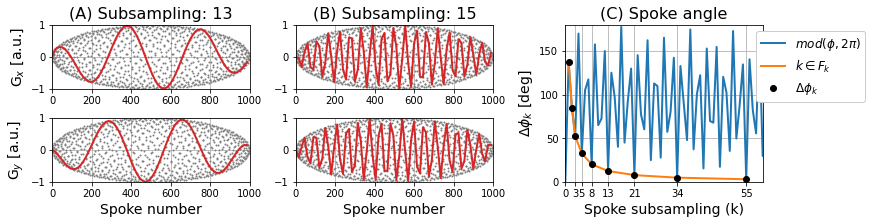

In [4]:
npoints = 1000
n = np.arange(npoints)

# Increment azimuthal angle by golden angle
phi = n*ag
# Produce a linear z gradient
z = n/npoints*2 - 1
theta = np.arccos(z)

# Convert to spherical coordinates
x = np.cos(phi)*np.sin(theta)
y = np.sin(phi)*np.sin(theta)


fig = plt.figure(constrained_layout=True, figsize=(12,3))
gspec = gridspec.GridSpec(ncols=3, nrows=2, figure=fig)

labs = ['A', 'B']
for (i,ss) in enumerate([13, 15]):
    
    ax = fig.add_subplot(gspec[0, i])
    plt.plot(n, x, '.', markersize=2, color='gray')
    plt.plot(n[0::ss], x[0::ss], '-', color='C03', linewidth=2)
    plt.grid()
    plt.axis([0,npoints,-1,1])
    if i==0: plt.ylabel(r'G$_x$ [a.u.]', fontsize=14)
    plt.title('({}) Subsampling: {:d}'.format(labs[i], ss), fontsize=16)
    
    ax = fig.add_subplot(gspec[1, i])
    plt.plot(n, y, '.', markersize=2, color='gray')
    plt.plot(n[0::ss], y[0::ss], '-', color='C03', linewidth=2)
    plt.grid()
    plt.axis([0,npoints,-1,1])
    plt.xlabel('Spoke number', fontsize=14)
    if i==0: plt.ylabel(r'G$_y$ [a.u.]', fontsize=14)

ax = fig.add_subplot(gspec[:,2])
phi1 = np.mod(phi,2*np.pi)
mask = phi1>np.pi
phi1[mask] = -1*phi1[mask]+2*np.pi
phi1 *= 360/(2*np.pi)

# Predicted difference
pred_diff = np.rad2deg(2*np.pi/g**(np.arange(2,11)))

fibnum = np.array([fibonacci(x) for x in range(2,11)])
plt.plot(n, phi1, label=r'$mod(\phi,2\pi)$', color='C00', linewidth=2)
plt.plot(fibnum, phi1[fibnum], '-', label=r'$k\in F_k$', color='C01', linewidth=2)
plt.plot(fibnum, pred_diff, 'ok', label=r'$\Delta \phi_k$')

plt.xlabel("Spoke subsampling (k)", fontsize=14)
plt.ylabel(r"$\Delta \phi_k$ [deg]", fontsize=14)
plt.legend(framealpha=1, loc='upper right', fontsize=12, bbox_to_anchor=(1.55,1))
plt.axis([0,60,0,180])
plt.xticks([0,3,5,8,13,21,34,55])
plt.grid()
plt.title('(C) Spoke angle', fontsize=16)
    
# plt.tight_layout()
plt.savefig('Figure1_Rev1.png', dpi=300)

In [5]:
print("Spoke differences\n")
print("s \tn \tdphi (deg)")
for x in np.arange(2,11):
    dphi = np.rad2deg(2*np.pi/g**x)
    print("{} \t{} \t{:.2f}".format(x, fibonacci(x), dphi))

Spoke differences

s 	n 	dphi (deg)


TypeError: k needs to be an integer